In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ML_PROJECT

/content/drive/My Drive/ML_PROJECT


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import random
import os
import shutil

In [4]:
import sys 
sys.path.append("/content/drive/MyDrive/ML_PROJECT")
from generate_data import get_data_generator

In [5]:
training_data,validation_data,testing_data=get_data_generator()
print(" training dataset : ", len(training_data))
print(" testing dataset : ", len(testing_data))
print(" validation dataset :", len(validation_data))


Found 5520 images belonging to 2 classes.
Found 2207 images belonging to 2 classes.
Found 20667 images belonging to 2 classes.
 training dataset :  646
 testing dataset :  173
 validation dataset : 69


In [7]:
image_size = [224, 224]

vgg19 = VGG19(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

80142336/80134624 [==============================] - 3s 0us/step


In [8]:
# don't train pretrained layers
for layer in vgg19.layers:
    layer.trainable = False
    

In [9]:
x = Flatten()(vgg19.output)

In [10]:
predictions = Dense(2, activation = 'softmax')(x)
model = Model( inputs = vgg19.input, outputs = predictions)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# optimizer adam
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.callbacks import CSVLogger
len(training_data)

646

In [ ]:
csv_logger = CSVLogger('training.log', separator=',', append=False)
History = model.fit( 
    training_data, 
    validation_data = validation_data, 
    epochs = 30, 
    steps_per_epoch = len(training_data),
    validation_steps = len(validation_data),
    callbacks=[csv_logger]
    )
model.save('saved_model')

Epoch 1/30
646/646 [==============================] - 11188s 17s/step - loss: 0.4056 - accuracy: 0.8241 - val_loss: 0.2926 - val_accuracy: 0.8890
Epoch 2/30
646/646 [==============================] - 250s 388ms/step - loss: 0.2776 - accuracy: 0.8879 - val_loss: 0.2458 - val_accuracy: 0.8958
Epoch 3/30
646/646 [==============================] - 239s 370ms/step - loss: 0.2711 - accuracy: 0.8955 - val_loss: 0.2540 - val_accuracy: 0.9058
Epoch 4/30
646/646 [==============================] - 243s 376ms/step - loss: 0.2681 - accuracy: 0.8976 - val_loss: 1.0121 - val_accuracy: 0.7399
Epoch 5/30
646/646 [==============================] - 243s 376ms/step - loss: 0.2485 - accuracy: 0.9089 - val_loss: 0.2374 - val_accuracy: 0.9044
Epoch 6/30
646/646 [==============================] - 241s 374ms/step - loss: 0.2451 - accuracy: 0.9109 - val_loss: 0.3674 - val_accuracy: 0.8722
Epoch 7/30
646/646 [==============================] - 242s 374ms/step - loss: 0.2502 - accuracy: 0.9112 - val_loss: 0.4170 -

In [ ]:
# Evaluating Model:
import pandas as pd
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import keras


In [ ]:

#model = keras.models.load_model('saved_model')
#History = pd.read_csv('training.log', sep=',', engine = 'python')

History

In [ ]:
testing_data.reset()
predictions = model.predict(testing_data, steps = len(testing_data))
# index of the label with largest predicted probability of each testing image
predictions = np.argmax(predictions, axis=1)


In [ ]:
print( classification_report(testing_data.classes, predictions, target_names= testing_data.class_indices.keys()))

              precision    recall  f1-score   support

 Parasitized       0.98      0.81      0.89      2728
  Uninfected       0.84      0.98      0.91      2792

    accuracy                           0.90      5520
   macro avg       0.91      0.90      0.90      5520
weighted avg       0.91      0.90      0.90      5520



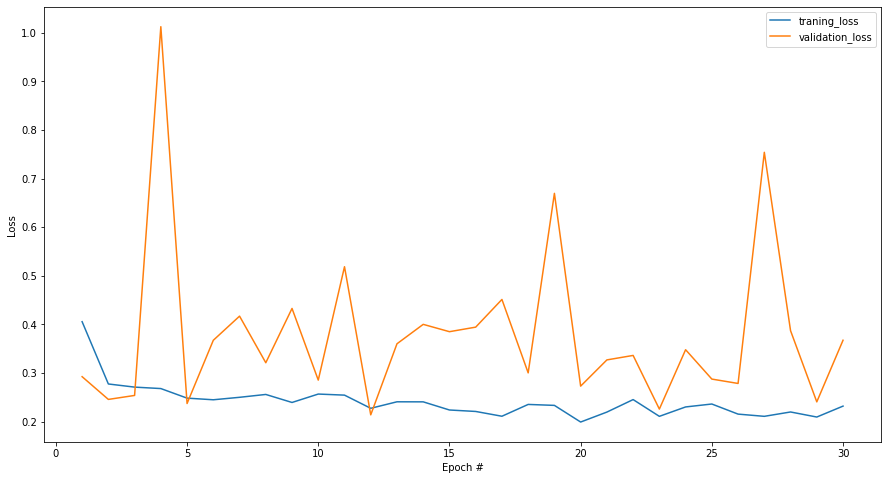

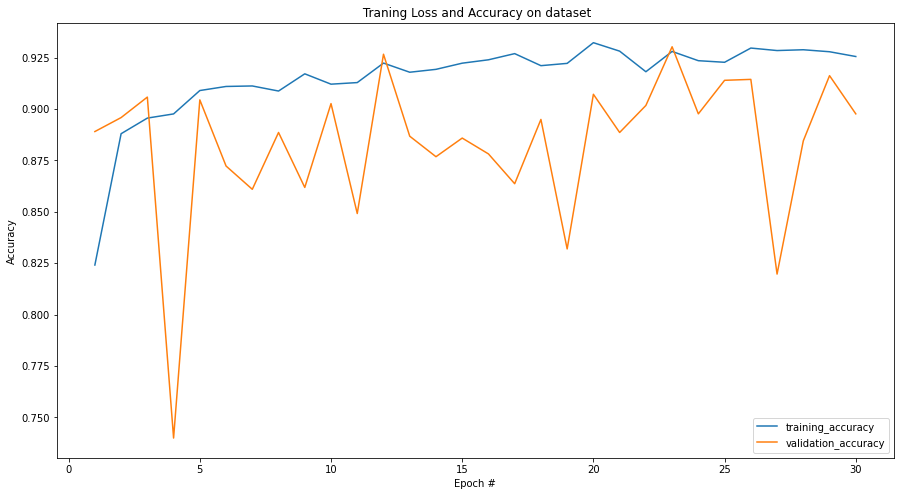

In [ ]:
# ploting training loss and accuracy
import numpy
N = 30 #number of epochs
num = []
for i in range(1, 31):
  num.append(i)
plt.figure(figsize=(15, 8))
plt.plot(num, History.history["loss"], label ="traning_loss")
plt.plot(num, History.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend(loc ='upper right')
plt.show()
plt.figure(figsize=(15, 8))
plt.plot(num, History.history['accuracy'], label='training_accuracy')
plt.plot(num, History.history['val_accuracy'], label = 'validation_accuracy')
plt.title(' Traning Loss and Accuracy on dataset')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')
plt.show()












